# ***Student Performance analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv("student-por.csv")

In [3]:
# making a copy 
data = data1.copy()
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# dropping unwanted columns
data.drop(["famsize","Pstatus","reason","guardian","schoolsup","nursery","romantic","freetime","Medu","Fedu","Walc","failures"],axis =1,inplace =True)

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'Mjob', 'Fjob', 'traveltime',
       'studytime', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'famrel', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
# making Mjob and Fjob to one column Pjob(parent job)
def parent(job):
    if job["Mjob"] == "at_home" and job["Fjob"] == "at_home":
        return "at_home"
    else:
        return "working"

data["Pjob"] = data.apply(parent,axis=1)

In [10]:
data.head(1)

,school,sex,age,address,Mjob,Fjob,traveltime,studytime,famsup,paid,...,internet,famrel,goout,Dalc,health,absences,G1,G2,G3,Pjob
0,GP,F,18,U,at_home,teacher,2,2,no,no,...,no,4,4,1,3,4,0,11,11,working


In [10]:
data.Pjob.value_counts()

Pjob
working    631
at_home     18
Name: count, dtype: int64

In [11]:
#dropping Mjob , Fjob column
data.drop(["Mjob","Fjob"],axis=1,inplace =True)

In [12]:
data.head(2)

,school,sex,age,address,traveltime,studytime,famsup,paid,activities,higher,internet,famrel,goout,Dalc,health,absences,G1,G2,G3,Pjob
0,GP,F,18,U,2,2,no,no,no,yes,no,4,4,1,3,4,0,11,11,working
1,GP,F,17,U,1,2,yes,no,no,yes,yes,5,3,1,3,2,9,11,11,working


In [13]:
#checking value count of school
data.school.value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

In [13]:
#checking value count of school with respect to address
pd.crosstab(data.school,data.address)

address,R,U
school,,
GP,78,345
MS,119,107


In [14]:
# checking value count of address
data.address.value_counts()

address
U    452
R    197
Name: count, dtype: int64

### --Male and Female count in each school--

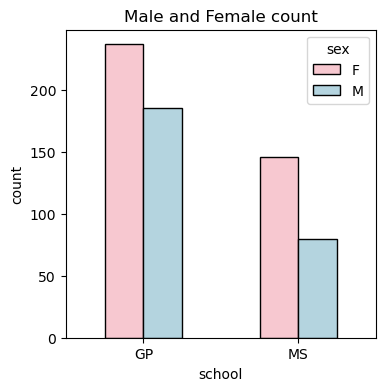

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(data=data,x ="school",hue="sex",palette =["pink","lightblue"],width =0.5,legend="auto",edgecolor="black")
plt.title("Male and Female count")
plt.show()

- In GP school there is heigher number of students
- in both GP and MS school ratio of females is high than males

### --No of students comming from Rural and Urban area for each school--

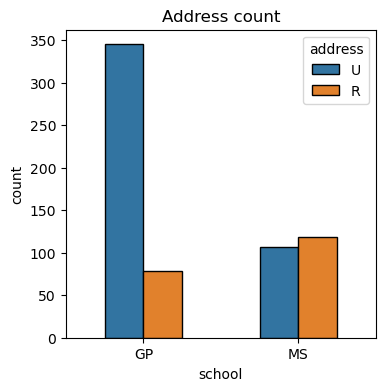

In [49]:
plt.figure(figsize=(4,4))
sns.countplot(data=data ,x="school",hue="address",edgecolor="black",width =0.5)
plt.title("Address count")
plt.show()

- In GP school maximum students come from urban area.
- In MS school student count from both urban and rural area are same but student count from rural area is quite high.
- GP school is located near urban area and far from rural area this can be reason for minimum count of student from rural area.
- The MS school might be located in a more rural or semi-urban area, making it equally accessible to both rural and urban students.
- Schools in urban areas often have better facilities, resources, and qualified teachers, making them more attractive to urban students.
- If MS school is more affordable or has policies that support students from lower-income families 
  

### -- Average traveltime require for each school with their address--

In [94]:
# 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
time_mean = round(data.groupby(["school","address"])["traveltime"].mean(),2).reset_index()
time_mean

,school,address,traveltime
0,GP,R,1.82
1,GP,U,1.34
2,MS,R,2.05
3,MS,U,1.58


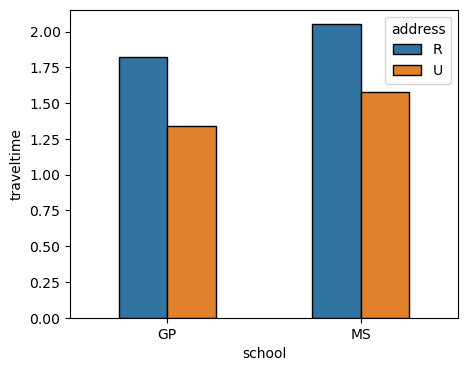

In [95]:
# plotting Average traveltime require for each school with their address
plt.figure(figsize=(5,4))
sns.barplot(data=time_mean, x ="school" ,y = "traveltime" ,hue ="address",width = 0.5,edgecolor ="black")
plt.show()

- At both schools (GP and MS), rural students have higher average travel times compared to urban students.
- Urban students have shorter average travel times at both schools.
- This indicates that Rural students generally have to travel further to reach the schools.
- The difference in travel time suggests that GP School might be located closer to urban areas or that there are better transportation options for urban students. Rural students face significantly longer commutes.
- MS School shows the highest average travel time for rural students, indicating it might be situated further from rural areas or have less effective transportation services.
  

### --Average age of students from each school--

In [100]:
data.groupby(["school","address"])["age"].mean().reset_index()

,school,address,age
0,GP,R,16.858974
1,GP,U,16.623188
2,MS,R,16.747899
3,MS,U,17.046729


### --Overall Performance Analysis--

In [118]:
data[["G1","G2","G3"]].describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


-  The increasing mean grades from G1 to G3 suggest a general trend of improvement in student performance as they progress through the academic periods.
-  The rise in standard deviation from G1 to G3 indicates that while the average performance improves, there is a greater spread of performance levels among students by the final period.
  

### --Performance by School for each test--

In [134]:
data.groupby(["school"])[["G1","G2","G3"]].mean()

,G1,G2,G3
school,,,
GP,11.985816,12.144208,12.576832
MS,10.300885,10.495575,10.650442


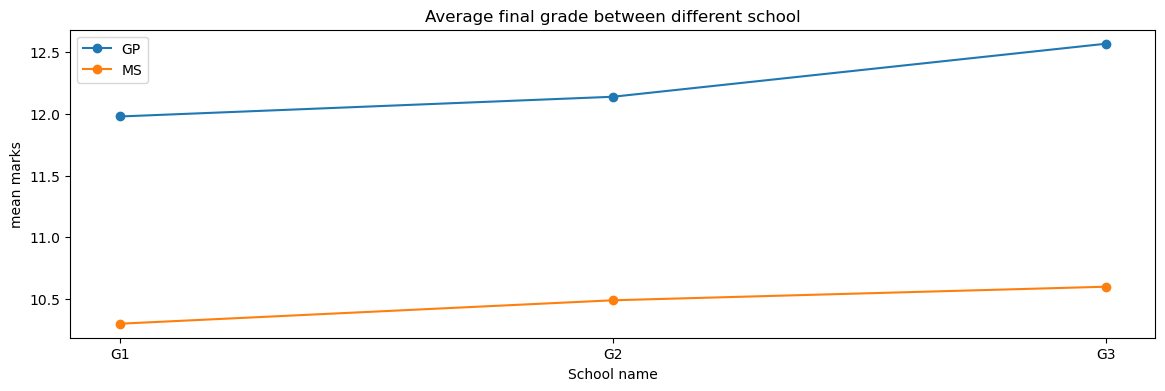

In [7]:
gp = pd.Series({"G1":11.98 ,"G2":12.14 ,"G3":12.57})
ms = pd.Series({"G1":10.30 ,"G2":10.49 ,"G3":10.60})

plt.figure(figsize=(14,4))
plt.plot(gp.index,gp.values,marker="o",label = "GP")
plt.plot(ms.index,ms.values,marker ="o",label = "MS")
plt.legend()
plt.xlabel("School name")
plt.ylabel("mean marks")
plt.title("Average final grade between different school")
plt.show()

- GP School consistently shows higher average grades than MS School across all periods
- This trend indicates that students at GP School generally perform better on average compared to students at MS School.
- There is a noticeable increase in average grades from G1 to G3. This suggests that students at GP School improve their performance over time.
- The average grades also show an increase from G1 to G3, but the increase is smaller compared to GP School. This indicates that while students at MS School do improve, the improvement is less pronounced.
- 

### --Performance by Address for each test--

In [11]:
data.groupby(["address"])[["G1","G2","G3"]].mean()

,G1,G2,G3
address,,,
R,10.746193,10.888325,11.086294
U,11.683628,11.867257,12.263274


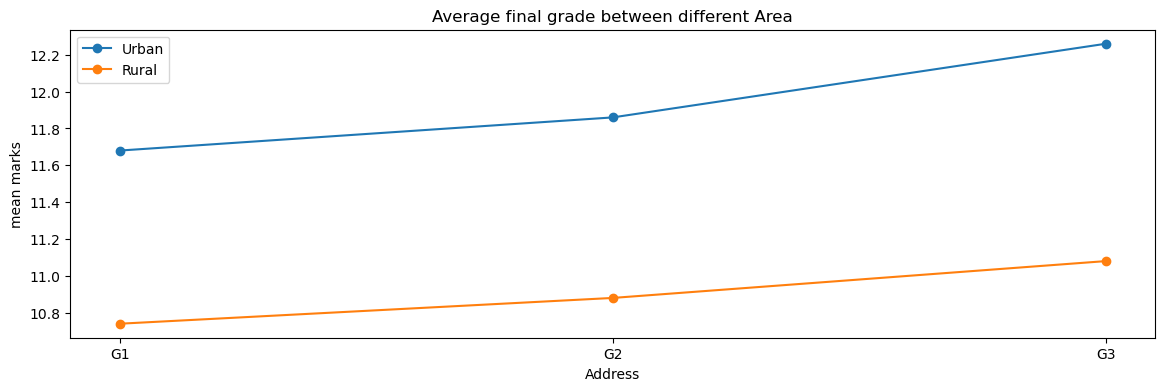

In [13]:
u = pd.Series({"G1":11.68 ,"G2":11.86 ,"G3":12.26})
r = pd.Series({"G1":10.74 ,"G2":10.88 ,"G3":11.08})

plt.figure(figsize=(14,4))
plt.plot(u.index,u.values,marker="o",label = "Urban")
plt.plot(r.index,r.values,marker ="o",label = "Rural")
plt.legend()
plt.xlabel("Address")
plt.ylabel("mean marks")
plt.title("Average final grade between different Area")
plt.show()

- Urban students consistently have higher average grades compared to Rural students across all periods
- This trend suggests that students living in urban areas perform better on average than their rural counterparts.
- Both Rural and Urban students show an increase in average grades from G1 to G3, indicating that students generally improve their performance over tim

### --student performance with respect to traveltime--

In [23]:
data.groupby(["school"])[["traveltime","G3"]].mean()

,traveltime,G3
school,,
GP,1.430260,12.576832
MS,1.827434,10.650442


- Students at GP School, who have shorter travel times, tend to have higher average grades in G3.
- Students at MS School, who have longer travel times on average, tend to have lower average grades in G3.

### --Students performance based on each school and studytime--

In [25]:
data.groupby(["school","studytime"])["G3"].mean()

school  studytime
GP      1            11.529412
        2            12.733010
        3            13.563380
        4            13.407407
MS      1             9.967742
        2            10.757576
        3            12.307692
        4            11.875000
Name: G3, dtype: float64

In [31]:
time = {}
for i in data["school"].value_counts().keys():
    time[i]={}
    for j in data["studytime"].value_counts().keys():
        h1 = data[(data["school"] == i) & (data["studytime"] == j)]
        rate = round(h1["G3"].mean(),2)
        time[i][j] = rate

time

{'GP': {2: 12.73, 1: 11.53, 3: 13.56, 4: 13.41},
 'MS': {2: 10.76, 1: 9.97, 3: 12.31, 4: 11.88}}

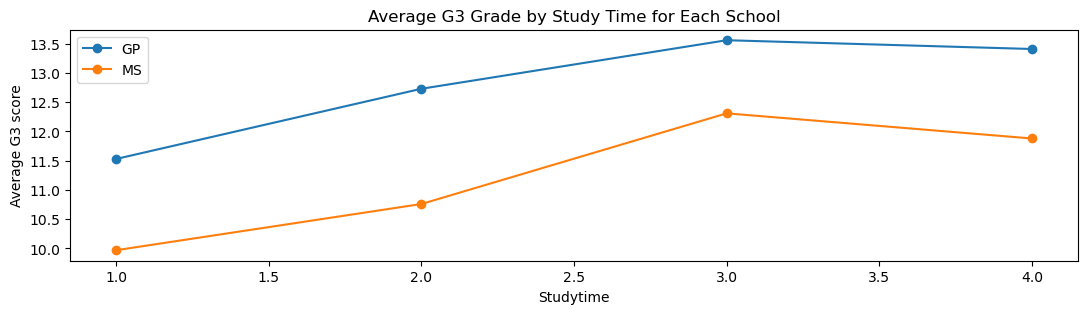

In [40]:
gp = pd.Series({1:11.53,2:12.73,3:13.56,4:13.41})
ms = pd.Series({1: 9.97,2: 10.76, 3: 12.31, 4: 11.88})
#numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
plt.figure(figsize=(13,3))
plt.plot(gp.index,gp.values,marker ="o",label ="GP")
plt.plot(ms.index,ms.values,marker ="o",label = "MS")
plt.legend()
plt.xlabel("Studytime")
plt.ylabel("Average G3 score")
plt.title("Average G3 Grade by Study Time for Each School")
plt.show()

- Both GP and MS schools show a trend where average G3 grades increase as studytime increases from <2 hours to 5-10 hours. This suggests that students who dedicate more time to studying tend to achieve higher final grades.
- The highest grades for both schools are in the 5-10 hours study category. For GP, this is 13.56, and for MS, it is 12.31.
- For both schools, there is a slight decline in average grades when students study for more than 10 hours a week
- This decline suggests that studying more than 10 hours a week might lead to diminishing returns or even burnout, where the additional study time does not translate into higher grades.
- The data suggests that an optimal study time for the highest grades is between 5 to 10 hours per week. Beyond this range, the benefits of additional study time diminish or even negatively impact grades.

### --Students performance based on family support for each school--


In [44]:
data.groupby(["school","famsup"])[["G3"]].mean()

G3
school famsup           
GP     no      12.240260
       yes     12.769517
MS     no      10.752577
       yes     10.573643

- Students with family support (famsup = yes) have a slightly higher average G3 grade (12.77) compared to those without family support (famsup = no, 12.24).
- In MS, the trend is different. Students without family support (famsup = no) have a slightly higher average G3 grade (10.75) compared to those with family support (famsup = yes, 10.57).
- In MS, students without family support perform slightly better. This could be due to a variety of reasons:
   - Self-reliance and independence: Students who don't rely on family support might develop more independence and self-discipline, which could contribute to slightly better performance.
  - Compensatory behavior: Students without family support might seek other resources or support systems to compensate, potentially leading to more focused study habits.
  

### --Students performance based on Extra tution for each school--

In [56]:
data.groupby(["school","paid"])[["G3"]].mean()

G3
school paid           
GP     no    12.632242
       yes   11.730769
MS     no    10.680751
       yes   10.153846

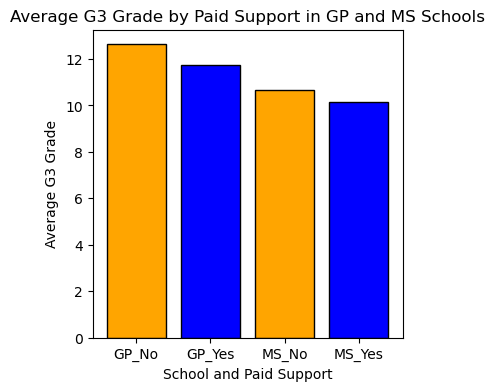

In [64]:
schools = ['GP_No', 'GP_Yes', 'MS_No', 'MS_Yes']
paid_status = ['no', 'yes', 'no', 'yes']
avg_g3_grades = [12.63, 11.73, 10.68, 10.15]

# Plotting the bar plot
plt.figure(figsize=(4, 4))
bars = plt.bar(schools, avg_g3_grades, color=['orange', 'blue', 'orange', 'blue'], edgecolor='black')

# Adding labels and title
plt.xlabel('School and Paid Support')
plt.ylabel('Average G3 Grade')
plt.title('Average G3 Grade by Paid Support in GP and MS Schools')
plt.show()

- In both schools, students without paid education support tend to have better average grades than those with it. This could imply that the additional paid education does not necessarily enhance performance and may even suggest other factors at play, such as dependency on external help or less effective use of study time

### --Students performance based on internet connection at home--

In [65]:
data.groupby(["school","internet"])[["G3"]].mean()

G3
school internet           
GP     no        12.134328
       yes       12.660112
MS     no        10.142857
       yes       10.950704

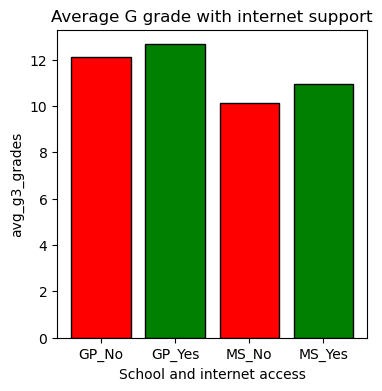

In [66]:
schools = ['GP_No', 'GP_Yes', 'MS_No', 'MS_Yes']
internet = ['no', 'yes', 'no', 'yes']
avg_g3_grades = [12.13, 12.66, 10.14, 10.95]

plt.figure(figsize=(4,4))
plt.bar(schools , avg_g3_grades, color =["red","green","red","green"],edgecolor = "black")
plt.xlabel("School and internet access")
plt.ylabel("avg_g3_grades")
plt.title("Average G grade with internet support")
plt.show()

- In both schools, students with internet access generally achieve better grades than those without it. This suggests that having access to the internet might provide additional resources and support that contribute to improved academic performance.

### --Alchol consumption by students for each school--

In [76]:
data.pivot_table(values = "G3",index ="school" ,columns = "Dalc")

Dalc,1,2,3,4,5
school,,,,,
GP,12.936667,12.063291,11.227273,10.75,11.000000
MS,11.033113,10.047619,11.047619,4.60,9.142857


In [81]:
x =[1,2,3,4,5]

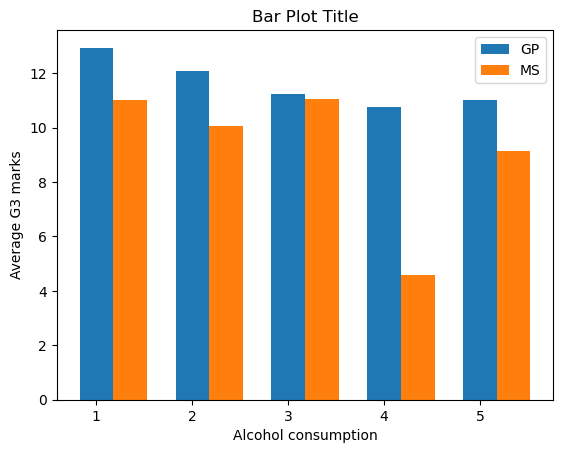

In [85]:
x = [1, 2, 3, 4, 5]
gp_heights = [12.936667, 12.063291, 11.227273, 10.75, 11.000000]
ms_heights = [11.033113, 10.047619, 11.047619, 4.60, 9.142857]

# Bar width
width = 0.35

# X positions for bars
x1 = x
x2 = [i + width for i in x]

# Plotting the bars
plt.bar(x1, gp_heights, width=width, label="GP")
plt.bar(x2, ms_heights, width=width, label="MS")
plt.xlabel('Alcohol consumption')  # Replace with your x-axis label
plt.ylabel('Average G3 marks')  # Replace with your y-axis label
plt.title('Bar Plot Title')  # Replace with your title
plt.legend()

# Display the plot
plt.show()

- Daily alcohol consumption generally has a negative effect on academic performance in both schools. The impact is particularly severe at higher consumption levels, especially in MS.
- Increased daily alcohol consumption correlates with lower average grades. The effect is more pronounced in MS, with the most significant drop in average grades observed at high levels of consumption.

### --Absences of students for each school--

In [92]:
data.groupby(["school"])[["absences"]].mean()

,absences
school,
GP,4.215130
MS,2.619469


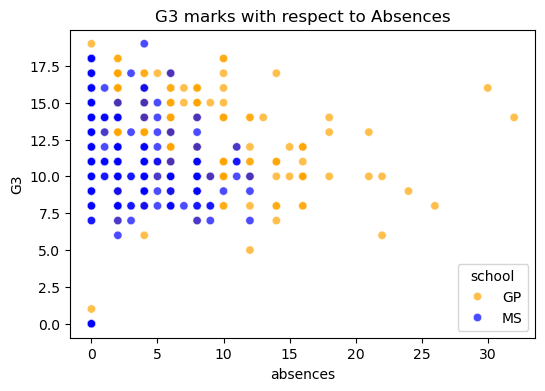

In [98]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='absences', y='G3', hue='school', palette={'GP': 'orange', 'MS': 'blue'}, alpha=0.7)
plt.title("G3 marks with respect to Absences")
plt.show()

- Higher absences in the GP school might negatively impact academic performance, potentially contributing to lower grades compared to the MS school.


### --Correlation matrix--

In [100]:
correlation_matrix = data[['G3', 'studytime', 'absences', 'health', 'goout', 'Dalc']].corr()
correlation_matrix

,G3,studytime,absences,health,goout,Dalc
G3,1.000000,0.249789,-0.091379,-0.098851,-0.087641,-0.204719
studytime,0.249789,1.000000,-0.118389,-0.056433,-0.075442,-0.137585
absences,-0.091379,-0.118389,1.000000,-0.030235,0.085374,0.172952
health,-0.098851,-0.056433,-0.030235,1.000000,-0.015741,0.059067
goout,-0.087641,-0.075442,0.085374,-0.015741,1.000000,0.245126
Dalc,-0.204719,-0.137585,0.172952,0.059067,0.245126,1.000000


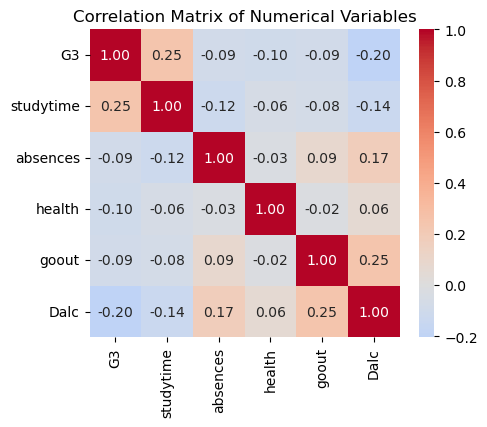

In [102]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

- Overall, studytime has the strongest positive correlation with G3, while absences, health, goout, and Dalc have weak to moderate negative correlations with final grades.

In [107]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

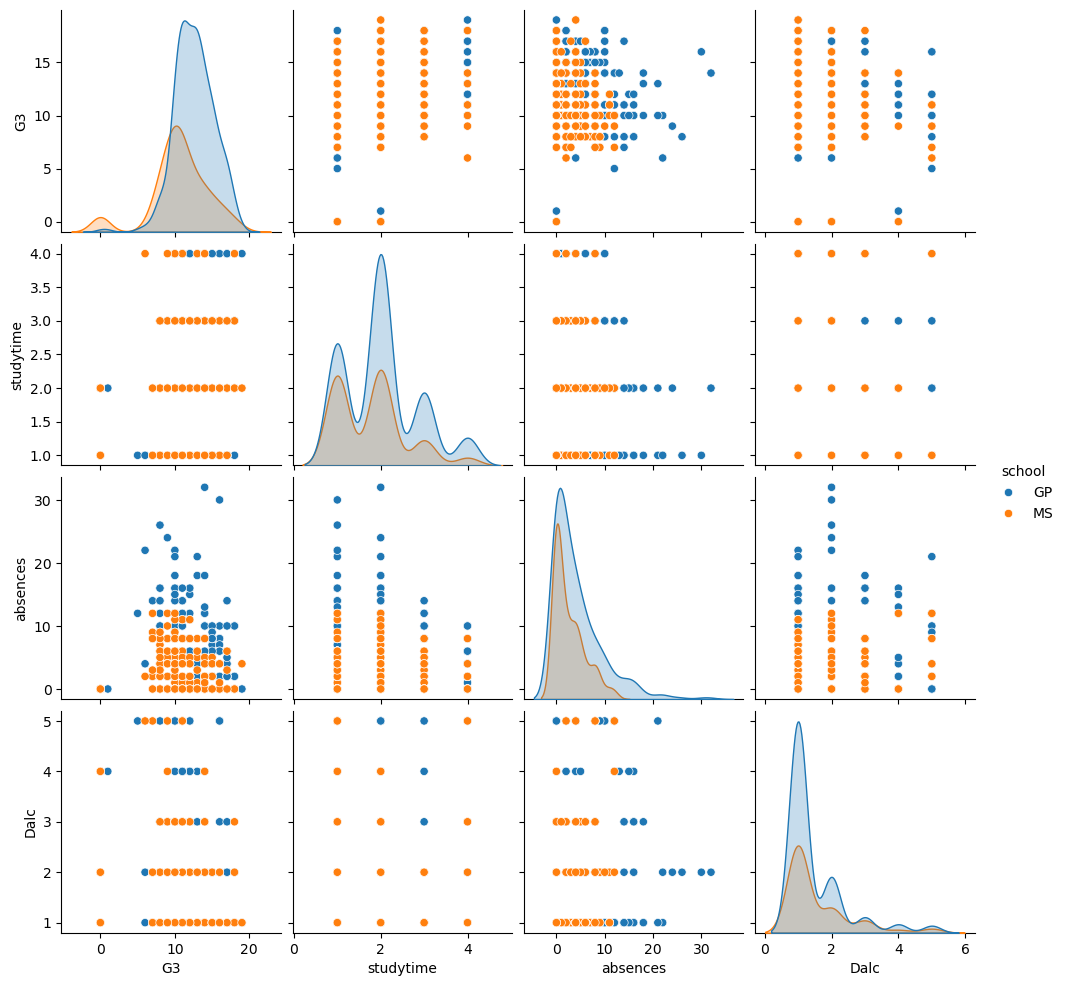

In [109]:
sns.pairplot(data[['G3', 'studytime', 'absences', 'Dalc', 'school']], hue='school')
plt.show()

### **Final Conclusion for the Student Performance Analysis Project**

This project has provided a comprehensive analysis of factors influencing student performance across two schools (GP and MS). Here are the key conclusions derived from the analysis:

1. **School Performance Disparities**: 
   - **GP School** consistently outperforms **MS School** across all academic periods (G1, G2, G3). The students at GP school show a steady improvement in their grades from G1 to G3, suggesting better academic growth and a more effective learning environment. In contrast, students at MS school also improve, but the increase in grades is less pronounced.

2. **Urban vs. Rural Performance**:
   - Urban students generally achieve higher grades than their rural counterparts across all periods. The proximity to resources, better facilities, and shorter travel times for urban students seem to contribute to this performance gap. Rural students, despite longer travel times, show improvement over time, indicating that while they face challenges, they are still capable of academic growth.

3. **Travel Time and Academic Performance**:
   - **GP School** students, who typically have shorter travel times, tend to have higher grades, reinforcing the idea that reduced travel stress can positively impact academic performance. On the other hand, **MS School** students, who travel longer distances, show lower grades, suggesting that long commutes may detract from study time and energy, affecting overall performance.

4. **Study Time and Grades**:
   - An optimal study time of 5-10 hours per week was identified for both schools, leading to the highest grades. Beyond this range, particularly when exceeding 10 hours, grades tended to decrease, possibly due to burnout or diminishing returns on study effort. This finding highlights the importance of balanced study habits.

5. **Family and Paid Support**:
   - The role of family support varies between schools. At GP School, students with family support perform slightly better, while at MS School, students without family support have marginally higher grades. This difference could be due to a variety of socio-economic or cultural factors influencing how students utilize available support.
   - Interestingly, students without paid education support tend to have better grades, suggesting that reliance on paid tutoring might not always translate to academic success. It could imply that self-study or other non-paid resources are more effective for these students.

6. **Internet Access and Performance**:
   - Access to the internet has a positive correlation with better grades in both schools. This indicates that students with internet access are likely benefiting from additional resources, such as online study materials and educational tools, enhancing their learning experience.

7. **Alcohol Consumption**:
   - Daily alcohol consumption negatively impacts academic performance, especially in MS School. Higher levels of alcohol consumption are associated with significantly lower grades, emphasizing the detrimental effects of alcohol on students' cognitive abilities and academic focus.

8. **Absenteeism**:
   - Higher absenteeism rates, particularly in GP School, have a negative impact on academic performance. Regular attendance is crucial for maintaining and improving grades, as students who miss more classes are likely missing out on important instructional time.

9. **Correlation Insights**:
   - Study time shows the strongest positive correlation with final grades (G3), reaffirming the importance of dedicated study efforts. On the other hand, factors like absences, health, and daily alcohol consumption show weak to moderate negative correlations with grades, indicating that these aspects, while not overwhelmingly impactful individually, can collectively influence student performance.

### **Overall Conclusion**
This project underscores the complex interplay of various factors influencing student performance. School environment, study habits, access to resources, and personal behaviors all contribute to academic outcomes. Targeted interventions, such as improving school facilities in rural areas, encouraging balanced study habits, reducing absenteeism, and promoting healthy lifestyles, can significantly enhance student performance. Moreover, understanding the specific needs and challenges of each school and student demographic is essential for implementing effective educational strategies.